In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
data = pd.read_csv('wine-results.csv')

In [84]:
data.model_name.unique()

array(['Model 0', 'Model 1', 'Model 2', 'Majority Voting',
       'Higher Belief', 'Baseline Model', 'Ensemble Model', 'Model 3',
       'Model 4'], dtype=object)

In [85]:
type_splits = {
    1: 'Cluster-based',
    2: 'Random sampling without replacement',
    3: 'Random sampling with replacement'
}

In [86]:
data.type_split = data.type_split.map(type_splits)

In [87]:
cols_to_drop = [col for col in data.model_name.unique() if col.startswith('Model')]

In [88]:
results = data[data.model_name.isin(cols_to_drop) == False]

In [89]:
results

,model_name,fold,num_estimators,type_split,balanced_accuracy,f1
3,Majority Voting,0,3,Cluster-based,0.269329,0.526851
4,Higher Belief,0,3,Cluster-based,0.317966,0.562372
5,Baseline Model,0,3,Cluster-based,0.304895,0.575278
6,Ensemble Model,0,3,Cluster-based,0.264102,0.540593
12,Majority Voting,0,5,Cluster-based,0.242044,0.544526
...,...,...,...,...,...,...
230,Ensemble Model,4,3,Random sampling with replacement,0.300069,0.562015
236,Majority Voting,4,5,Random sampling with replacement,0.303670,0.527211
237,Higher Belief,4,5,Random sampling with replacement,0.276320,0.494265
238,Baseline Model,4,5,Random sampling with replacement,0.307387,0.546721


## Test type of sampling

In [90]:
df = results[results.num_estimators == 3]

In [91]:
df = df.groupby(['model_name', 'type_split']).mean().reset_index()

Text(0, 0.5, 'Average Balanced Accuracy')

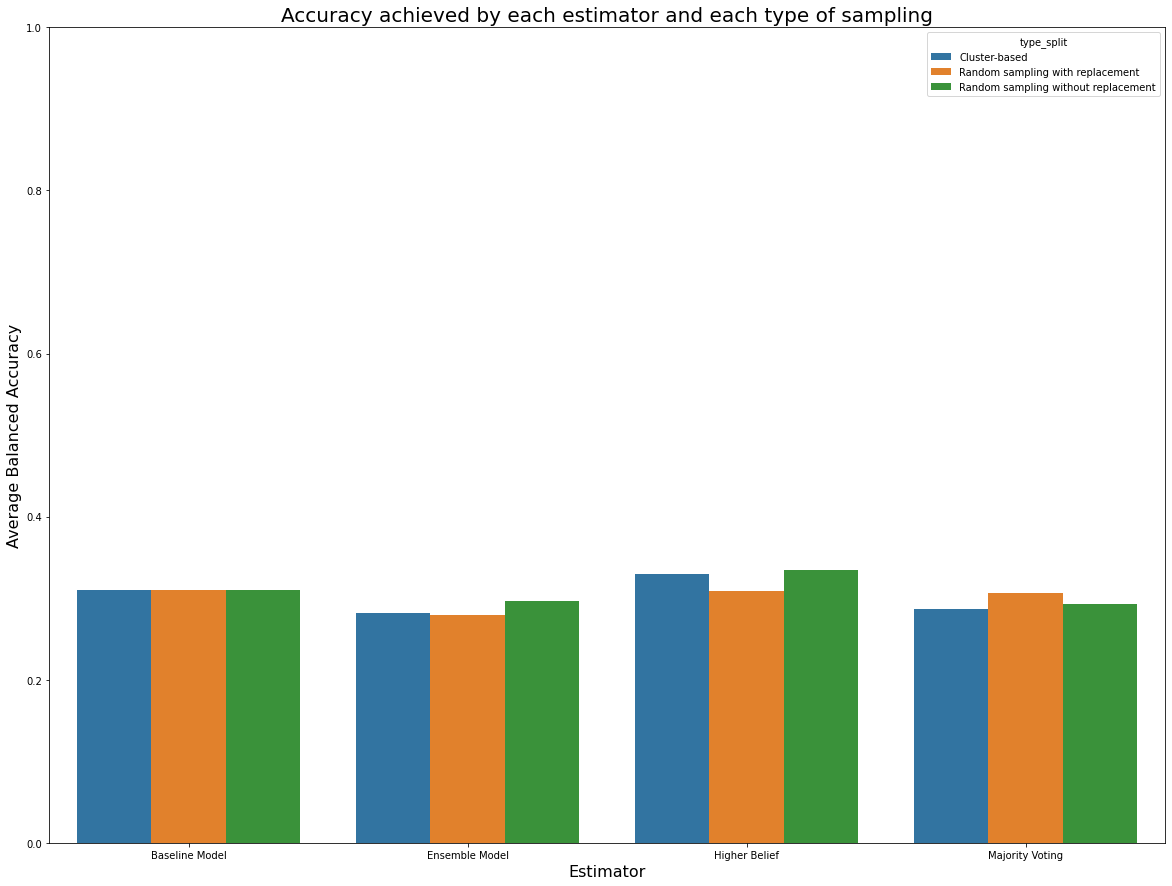

In [92]:
plt.figure(figsize=(20, 15))
sns.barplot(data=df, x='model_name', y='balanced_accuracy', hue='type_split')
plt.ylim(0, 1)
plt.title('Accuracy achieved by each estimator and each type of sampling', fontdict=dict(size=20))
plt.xlabel('Estimator', fontdict=dict(size=16))
plt.ylabel('Average Balanced Accuracy', fontdict=dict(size=16))

## Test number estimators

In [93]:
df = results[results.type_split=='Random sampling with replacement']
df.drop('type_split', axis=1, inplace=True)
df = df.groupby(['model_name', 'num_estimators']).mean().reset_index()

/var/folders/7x/f99kq48n5_7cdmmy6sz268nw0000gn/T/ipykernel_82229/540570966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('type_split', axis=1, inplace=True)


Text(0, 0.5, 'Average Balanced Accuracy')

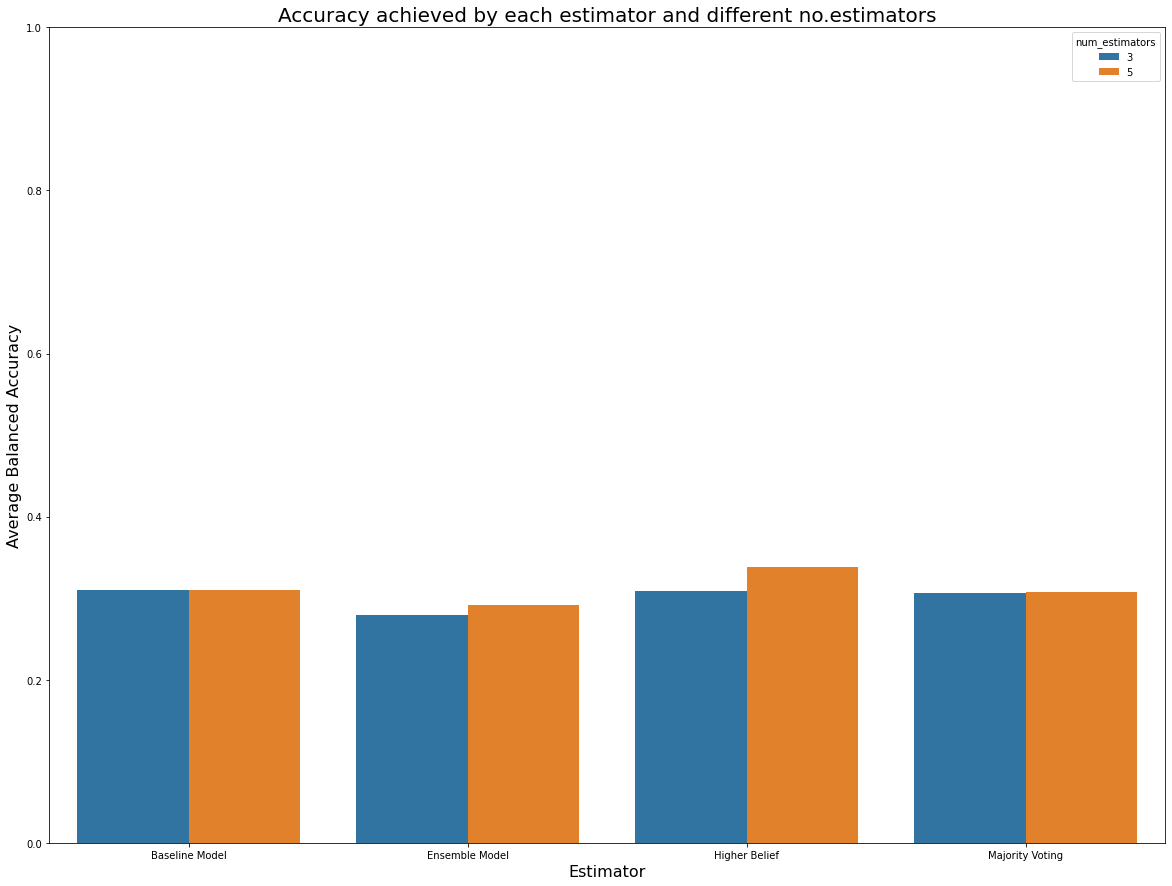

In [94]:
plt.figure(figsize=(20, 15))
sns.barplot(data=df, x='model_name', y='balanced_accuracy', hue='num_estimators')
plt.ylim(0, 1)
plt.title('Accuracy achieved by each estimator and different no.estimators', fontdict=dict(size=20))
plt.xlabel('Estimator', fontdict=dict(size=16))
plt.ylabel('Average Balanced Accuracy', fontdict=dict(size=16))